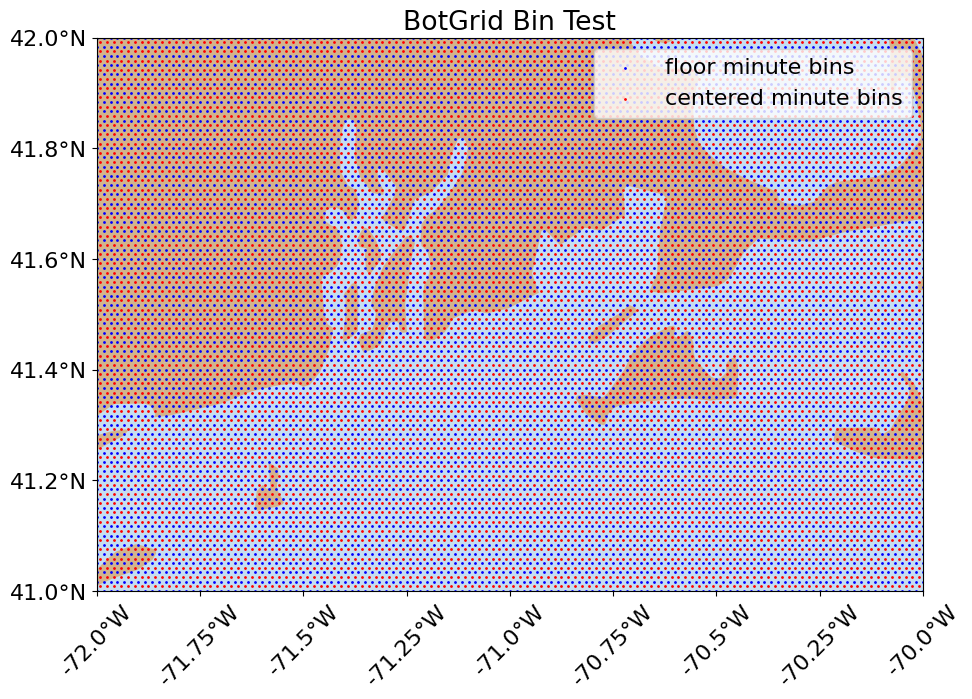

In [53]:
# Make the plots
import matplotlib.pyplot as plt
from matplotlib.patches import PathPatch
# from matplotlib_scalebar.scalebar import ScaleBar
# from haversine import haversine, Unit
from matplotlib.ticker import FuncFormatter
import numpy as np
from matplotlib.offsetbox import OffsetImage, AnnotationBbox
import geopandas as gpd
import pandas as pd
land_fp = r"/home/linus/Documents/repositories/interim-reports/shape files/PoliticalBoundaries_Shapefiles/NA_PoliticalDivisions/data/bound_p/boundary_p_v2.shp"
land = gpd.read_file(land_fp)
land = land.to_crs("EPSG:4326")
land = land.dropna(subset=['STATEABB'])

lat_min, lat_max = 41.0, 42.0  # Adjust bounds as needed
lon_min, lon_max = -72.0, -70.0  # Adjust bounds as needed

# Create a grid with 1-minute intervals (1 minute = 1/60 degree)
latitudes = np.arange(lat_min, lat_max + 1/60, 1/60)
longitudes = np.arange(lon_min, lon_max + 1/60, 1/60)

# Create a dataframe or grid
grid = pd.DataFrame({
    'latitude': np.tile(latitudes, len(longitudes)),
    'longitude': np.repeat(longitudes, len(latitudes))
})

# Adjust to make the coordinates the cell centers
lat_centers = latitudes[:-1] + 1/120  # Shift by half a minute
lon_centers = longitudes[:-1] + 1/120  # Shift by half a minute

# Create a dataframe or grid with cell centers
centered_grid = pd.DataFrame({
    'latitude': np.tile(lat_centers, len(lon_centers)),
    'longitude': np.repeat(lon_centers, len(lat_centers))
})



xmin, ymin, xmax, ymax = -72, 41, -70, 42
plt.rcParams.update({'font.size': 16})

land = land.cx[xmin:xmax, ymin:ymax]

fig, ax = plt.subplots(figsize=(10, 10))

land.plot(ax=ax,color='tan')
lon_grid, lat_grid = np.meshgrid(longitudes, latitudes)
lon_grid_center, lat_grid_center = np.meshgrid(lon_centers, lat_centers)
plt.scatter(lon_grid, lat_grid, color='blue', s=1,label='floor minute bins')  # s=1 for small dots
plt.scatter(lon_grid_center, lat_grid_center, color='red', s=1,label='centered minute bins')  # s=1 for small dots

ax.set_xlim(xmin, xmax)
ax.set_ylim(ymin, ymax)
ax.set_facecolor('#c5def0')

ax.set_title('BotGrid Bin Test')

def add_degree_symbol(x, pos):
    if x >= 0:
        return f'{round(x,2)}°N'
    elif x < 0:
        return f'{round(x,2)}°W'
    #return f'{x}°'
formatter = FuncFormatter(add_degree_symbol)

ax.xaxis.set_major_formatter(formatter)
ax.yaxis.set_major_formatter(formatter)
plt.xticks(rotation=45)
plt.legend()
plt.tight_layout()
plt.show()

/tmp/ipykernel_839409/3776195936.py:8: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  gdf['centroid'] = gdf.geometry.centroid


        id         left          top        right       bottom  row_index  \
0  24461.0  660920.7039  4359458.116  667920.7039  4352458.116      100.0   
1  24462.0  660920.7039  4352458.116  667920.7039  4345458.116      101.0   
2  24463.0  660920.7039  4345458.116  667920.7039  4338458.116      102.0   
3  24456.0  660920.7039  4394458.116  667920.7039  4387458.116       95.0   
4  24457.0  660920.7039  4387458.116  667920.7039  4380458.116       96.0   

   col_index      y_min      y_max      x_min      x_max  \
0      140.0  39.305237  39.369609 -67.133601 -67.050706   
1      140.0  39.242197  39.306566 -67.135274 -67.052456   
2      140.0  39.179156  39.243523 -67.136941 -67.054201   
3      140.0  39.620426  39.684809 -67.125160 -67.041870   
4      140.0  39.557389  39.621770 -67.126859 -67.043648   

                                            geometry  \
0  POLYGON ((-67.13192 39.36961, -67.05071 39.368...   
1  POLYGON ((-67.1336 39.30657, -67.05246 39.3052...   
2  POLYG

<Axes: >

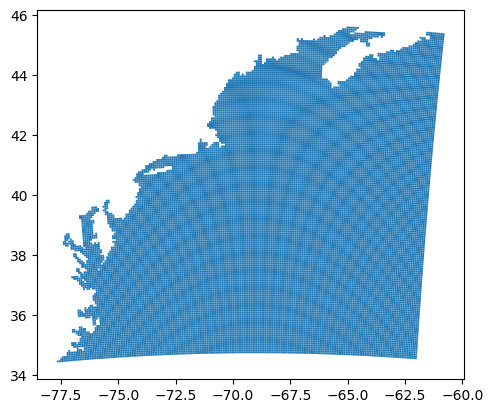

In [ ]:
import geopandas as gpd

fid = '7km/clipped_NE_grid_7km_reprojected.shp'

gdf_grid = gpd.read_file(fid)

print(gdf_grid.head())
gdf_grid.plot()

# Get Data From Various Sources

Aggregating Study Fleet, eMOLT, and CFRF data into a single dataframe

In [ ]:
import pandas as pd
study_fleet = pd.read_csv('data/local_data/SF_7KM_BottomTempData_AllData.csv')
study_fleet['OBSERVATION_DATE'] = pd.to_datetime(study_fleet['OBSERVATION_DATE'])
study_fleet.rename(columns={'OBSERVATION_DATE': 'time', 'GRID_ID': 'id','TEMP':'temperature'}, inplace=True)
import geopandas as gpd
from shapely.geometry import Point
fid = '7km/clipped_NE_grid_7km_reprojected.shp'
gdf_grid = gpd.read_file(fid)
projected_crs = "EPSG:5070"  # Albers Equal Area Conic
# projected_crs = "EPSG:4326"  # WSG84. Cannot use to find grid centroids
gdf_grid = gdf_grid.to_crs(projected_crs)
gdf_grid['centroid'] = gdf_grid.geometry.centroid
gdf_grid['centroid'] = gdf_grid['centroid'].to_crs("EPSG:4326")
gdf_grid['geometry'] = gdf_grid['geometry'].to_crs("EPSG:4326")
gdf_grid['id'] = gdf_grid['id'].astype(int)
gdf_grid
study_fleet = study_fleet.merge(gdf_grid[['id','geometry', 'centroid']], on='id', how='left')
study_fleet

/tmp/ipykernel_403993/1465629347.py:3: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  study_fleet['OBSERVATION_DATE'] = pd.to_datetime(study_fleet['OBSERVATION_DATE'])


In [33]:

cfrf

,time,latitude,longitude,temperature
0,2014-01-24 19:00:00,42.504800,-67.467700,9.00
1,2014-01-24 20:00:00,42.504800,-67.467700,9.08
2,2014-01-24 21:00:00,42.504800,-67.467700,9.13
3,2014-01-24 22:00:00,42.504800,-67.467700,9.15
4,2014-01-24 23:00:00,42.504800,-67.467700,9.15
...,...,...,...,...
639180,2024-12-19 11:00:00,41.394351,-71.368215,8.74
639181,2024-12-19 12:00:00,41.394351,-71.368215,8.75
639182,2024-12-19 13:00:00,41.394351,-71.368215,8.77
639183,2024-12-19 14:00:00,41.394351,-71.368215,8.79


In [62]:
import xarray as xr
import pandas as pd
data = xr.open_dataset('data/local_data/eMOLT_RT_FULL.nc')
emolt = data.to_dataframe()
emolt['time'] = pd.to_datetime(emolt['time'])
keepers = ['time', 'latitude', 'longitude', 'temperature']
emolt.reset_index(inplace=True)
emolt = emolt[keepers]

from erddapy import ERDDAP
def truncate_at_first_space(col_name):
    return col_name.split(' ')[0]
server = 'https://erddap.ondeckdata.com/erddap/'
e = ERDDAP(
    server=server,
    protocol="tabledap",
    response="nc",
)
e.dataset_id = 'seafloor_oceanography'
# e.constraints = {'time>=': f'{start_time}',
#                     'time<=': '2023-12-31T23:59:59Z'}

cfrf = e.to_pandas()
cfrf.rename(columns=lambda x: truncate_at_first_space(x), inplace=True)
cfrf['time'] = pd.to_datetime(cfrf['time'])
cfrf['time'] = cfrf['time'].dt.tz_localize(None)
keepers = ['time', 'latitude', 'longitude', 'temperature']
cfrf = cfrf[keepers]

coop_fleet = pd.concat([emolt, cfrf], ignore_index=True)
coop_fleet

,time,latitude,longitude,temperature
0,2023-08-12 11:12:22,44.011101,-68.219704,9.544
1,2023-08-12 11:17:22,44.011101,-68.219704,9.539
2,2023-08-12 11:22:22,44.011101,-68.219704,9.527
3,2023-08-12 11:27:22,44.011101,-68.219704,9.515
4,2023-08-12 11:32:22,44.011101,-68.219704,9.501
...,...,...,...,...
12806664,2024-12-19 11:00:00,41.394351,-71.368215,8.740
12806665,2024-12-19 12:00:00,41.394351,-71.368215,8.750
12806666,2024-12-19 13:00:00,41.394351,-71.368215,8.770
12806667,2024-12-19 14:00:00,41.394351,-71.368215,8.790


In [63]:
from shapely.geometry import Point
# Step 1: Create a GeoDataFrame with unique latitude/longitude pairs
unique_points = coop_fleet.groupby(['latitude', 'longitude']).size().reset_index()[['latitude', 'longitude']]
unique_points['coordinates'] = unique_points.apply(lambda row: Point(row['longitude'], row['latitude']), axis=1)
unique_gdf = gpd.GeoDataFrame(unique_points, geometry='coordinates', crs="EPSG:4326")

# Step 2: Perform the spatial join on unique points
unique_joined = gpd.sjoin(unique_gdf, gdf_grid[['geometry', 'centroid']], how='left', predicate='within')

# Step 3: Map the results back to the original DataFrame
# Merge the centroid information back into the original DataFrame
df_new = coop_fleet.merge(unique_joined[['latitude', 'longitude', 'centroid']], 
                          on=['latitude', 'longitude'], 
                          how='left')

# Drop redundant columns if necessary
# df_new = df_new.drop(columns=['index_right'])
df_new

,time,latitude,longitude,temperature,centroid
0,2023-08-12 11:12:22,44.011101,-68.219704,9.544,POINT (-68.25865 44.01636)
1,2023-08-12 11:17:22,44.011101,-68.219704,9.539,POINT (-68.25865 44.01636)
2,2023-08-12 11:22:22,44.011101,-68.219704,9.527,POINT (-68.25865 44.01636)
3,2023-08-12 11:27:22,44.011101,-68.219704,9.515,POINT (-68.25865 44.01636)
4,2023-08-12 11:32:22,44.011101,-68.219704,9.501,POINT (-68.25865 44.01636)
...,...,...,...,...,...
12806664,2024-12-19 11:00:00,41.394351,-71.368215,8.740,POINT (-71.38783 41.4094)
12806665,2024-12-19 12:00:00,41.394351,-71.368215,8.750,POINT (-71.38783 41.4094)
12806666,2024-12-19 13:00:00,41.394351,-71.368215,8.770,POINT (-71.38783 41.4094)
12806667,2024-12-19 14:00:00,41.394351,-71.368215,8.790,POINT (-71.38783 41.4094)


In [64]:
study_fleet

,time,temperature,id
0,2012-11-02,16.2,15038
1,2012-11-02,16.0,15038
2,2012-11-02,16.0,15038
3,2012-11-02,16.2,15038
4,2012-11-02,16.2,15038
...,...,...,...
5271828,2006-10-16,8.6,22131
5271829,2006-10-16,8.6,22131
5271830,2006-10-16,8.6,22131
5271831,2006-10-16,8.6,22131


In [66]:
# df_new = df_new.drop(columns=['latitude', 'longitude'])
study_fleet = study_fleet.drop(columns=['id'])
full_fleet = pd.concat([study_fleet, df_new], ignore_index=True)
full_fleet

,time,temperature,geometry,centroid,latitude,longitude
0,2012-11-02 00:00:00,16.20,"POLYGON ((-71.58332 41.05842, -71.50009 41.060...",POINT (-71.54049 41.02785),NaN,NaN
1,2012-11-02 00:00:00,16.00,"POLYGON ((-71.58332 41.05842, -71.50009 41.060...",POINT (-71.54049 41.02785),NaN,NaN
2,2012-11-02 00:00:00,16.00,"POLYGON ((-71.58332 41.05842, -71.50009 41.060...",POINT (-71.54049 41.02785),NaN,NaN
3,2012-11-02 00:00:00,16.20,"POLYGON ((-71.58332 41.05842, -71.50009 41.060...",POINT (-71.54049 41.02785),NaN,NaN
4,2012-11-02 00:00:00,16.20,"POLYGON ((-71.58332 41.05842, -71.50009 41.060...",POINT (-71.54049 41.02785),NaN,NaN
...,...,...,...,...,...,...
18078497,2024-12-19 11:00:00,8.74,None,POINT (-71.38783 41.4094),41.394351,-71.368215
18078498,2024-12-19 12:00:00,8.75,None,POINT (-71.38783 41.4094),41.394351,-71.368215
18078499,2024-12-19 13:00:00,8.77,None,POINT (-71.38783 41.4094),41.394351,-71.368215
18078500,2024-12-19 14:00:00,8.79,None,POINT (-71.38783 41.4094),41.394351,-71.368215


In [65]:
import geopandas as gpd
from shapely.geometry import Point
fid = '7km/clipped_NE_grid_7km_reprojected.shp'
gdf_grid = gpd.read_file(fid)
projected_crs = "EPSG:5070"  # Albers Equal Area Conic
# projected_crs = "EPSG:4326"  # WSG84. Cannot use to find grid centroids
gdf_grid = gdf_grid.to_crs(projected_crs)
gdf_grid['centroid'] = gdf_grid.geometry.centroid
gdf_grid['centroid'] = gdf_grid['centroid'].to_crs("EPSG:4326")
gdf_grid['geometry'] = gdf_grid['geometry'].to_crs("EPSG:4326")
gdf_grid['id'] = gdf_grid['id'].astype(int)
gdf_grid
study_fleet = study_fleet.merge(gdf_grid[['id','geometry', 'centroid']], on='id', how='left')
study_fleet

,time,temperature,id,geometry,centroid
0,2012-11-02,16.2,15038,"POLYGON ((-71.58332 41.05842, -71.50009 41.060...",POINT (-71.54049 41.02785)
1,2012-11-02,16.0,15038,"POLYGON ((-71.58332 41.05842, -71.50009 41.060...",POINT (-71.54049 41.02785)
2,2012-11-02,16.0,15038,"POLYGON ((-71.58332 41.05842, -71.50009 41.060...",POINT (-71.54049 41.02785)
3,2012-11-02,16.2,15038,"POLYGON ((-71.58332 41.05842, -71.50009 41.060...",POINT (-71.54049 41.02785)
4,2012-11-02,16.2,15038,"POLYGON ((-71.58332 41.05842, -71.50009 41.060...",POINT (-71.54049 41.02785)
...,...,...,...,...,...
5271828,2006-10-16,8.6,22131,"POLYGON ((-68.1327 43.66883, -68.04588 43.6681...",POINT (-68.08977 43.63699)
5271829,2006-10-16,8.6,22131,"POLYGON ((-68.1327 43.66883, -68.04588 43.6681...",POINT (-68.08977 43.63699)
5271830,2006-10-16,8.6,22131,"POLYGON ((-68.1327 43.66883, -68.04588 43.6681...",POINT (-68.08977 43.63699)
5271831,2006-10-16,8.6,22131,"POLYGON ((-68.1327 43.66883, -68.04588 43.6681...",POINT (-68.08977 43.63699)


In [72]:
# full_fleet['time'] = full_fleet['time'].dt.tz_localize(None)
full_fleet['date'] = full_fleet['time'].dt.date
full_fleet_aggregated = full_fleet.groupby(['date', 'centroid']).agg({'temperature': ['mean','min','max','std','count']}).reset_index()
full_fleet_aggregated.columns = [
    '_'.join(filter(None, col)).strip() if col[1] else col[0]
    for col in full_fleet_aggregated.columns.to_flat_index()
]
full_fleet_aggregated['latitude'] = full_fleet_aggregated['centroid'].apply(lambda point: point.y)
full_fleet_aggregated['longitude'] = full_fleet_aggregated['centroid'].apply(lambda point: point.x)
full_fleet_aggregated = full_fleet_aggregated.drop(columns=['centroid'])
full_fleet_aggregated.rename(columns={'date': 'time','temperature_mean':'temperature'}, inplace=True)

full_fleet_aggregated#.columns = ['time', 'centroid', 'mean_temperature', 'min_temperature', 'max_temperature', 'std_temperature', 'count

,time,temperature,temperature_min,temperature_max,temperature_std,temperature_count,latitude,longitude
0,2006-09-20,7.312670,7.10,9.80,0.215126,442,42.872008,-70.672162
1,2006-09-20,7.350479,7.10,10.10,0.232478,313,42.808998,-70.670463
2,2006-09-21,7.350000,7.10,9.50,0.235267,272,42.872008,-70.672162
3,2006-09-21,7.382723,7.10,7.80,0.105954,191,42.808998,-70.670463
4,2006-09-22,7.335922,7.00,9.50,0.251572,206,42.872008,-70.672162
...,...,...,...,...,...,...,...,...
121729,2024-12-18,8.733889,8.33,9.12,0.243435,18,41.472402,-71.390137
121730,2024-12-18,9.185000,8.98,9.34,0.098000,38,41.409404,-71.387825
121731,2024-12-18,10.140000,10.00,10.26,0.091147,14,41.220405,-71.380934
121732,2024-12-18,10.665000,10.63,10.68,0.014606,16,41.159096,-71.295288


In [73]:
from datetime import datetime, timedelta
import os

def find_closest_depth(df) -> pd.DataFrame:
    '''Find the closest depth value from the bathymetry file'''
    fid = 'data/bathymetry/gebco_2024_n46.0_s36.0_w-76.0_e-64.0.nc'
    ds = xr.open_dataset(fid)
    # grouped = df.groupby('tow_id').agg({'latitude': 'first', 'longitude': 'first'}).reset_index()
    # Initialize an empty list to store depth values
    depths = ds.sel(
        lat=xr.DataArray(df['latitude'], dims='z'),
        lon=xr.DataArray(df['longitude'], dims='z'),
        method='nearest'
    )['elevation'].values

    # Add inferred depth as a new column, converting to absolute values
    df['depth'] = abs(depths).astype(int)
    return df

find_closest_depth(full_fleet_aggregated)
full_fleet_aggregated['time'] = pd.to_datetime(full_fleet_aggregated['time'])
# Define the epoch
epoch = datetime(1970, 1, 1)

# Convert time to days since epoch
full_fleet_aggregated['time'] = (full_fleet_aggregated['time'] - epoch).dt.days
full_fleet_aggregated
import xarray as xr
import pandas as pd
from datetime import datetime

grouped = full_fleet_aggregated.groupby("time")

def set_variable_attrs(var_name):
    attrs = {
        "temperature": {"units": "degrees Celsius", "standard_name": "sea_water_temperature"},
        "temperature_std": {"units": "degrees Celsius","comment":"Daily standard deviation of bottom temperatures"},
        "temperature_min": {"units": "degrees Celsius","comment":"Daily minimum bottom temperatures"},
        "temperature_max": {"units": "degrees Celsius","comment":"Daily maximum bottom temperatures"},
        "temperature_count": {"units": "count","comment":"The number of observations used to calculate the daily average temperature and subsequent weights  for overlapping cells"},
        "latitude": {"units": "degrees_north", "standard_name": "latitude", "axis": "Y","comment":'Standardized centroid from predefined 7km grid of US Northeast'},
        "longitude": {"units": "degrees_east", "standard_name": "longitude", "axis": "X","comment":'Standardized centroid from predefined 7km grid of US Northeast'},
        "time": {"standard_name": "time", "axis": "T", "units": "days since 1970-01-01"},
        "depth": {"units": "meters", "comment": "Depth inferred from GEBCO bathymetry data"},
    }
    return attrs.get(var_name, {})

for day, group in grouped:
    ds = xr.Dataset(
    {
        var: ("point", group[var].values)
        for var in group.columns if var not in ["time", "latitude", "longitude"]
    },
    coords={
        "latitude": ("point", group["latitude"].values),
        "longitude": ("point", group["longitude"].values),
        "time": ("point", [day] * len(group)),  # Repeat `day` for each point
    },
)
    

    for var in ds.data_vars:
        ds[var].attrs = set_variable_attrs(var)

    # Assign global metadata
    ds.attrs["title"] = f"BotGrid Temperature"
    ds.attrs["description"] = "Gridded daily observations of bottom temperature and related metrics."
    ds.attrs["institution"] = "NOAA NEFSC | CFRF"

    ds["temperature"] = ds["temperature"].astype("float32")
    ds["temperature_std"] = ds["temperature_std"].astype("float32")
    ds["temperature_min"] = ds["temperature_min"].astype("float32")
    ds["temperature_max"] = ds["temperature_max"].astype("float32")
    ds["temperature_count"] = ds["temperature_count"].astype("uint32")
    ds["depth"] = ds["depth"].astype("uint32")
    ds["latitude"] = ds["latitude"].astype("float32")
    ds["longitude"] = ds["longitude"].astype("float32")
    ds["time"] = ds["time"].astype("uint32")
    date = datetime(1970, 1, 1) + timedelta(days=day)

    # Extract year and month
    year = date.year
    month = date.month
    
    # Save to NetCDF file
    output_path = "data/nc_out_full"
    directory = f"{output_path}/{year}/{month}"
    if not os.path.exists(directory):
        os.makedirs(directory)
    filename = f"{directory}/botgrid_{day}.nc"
    # filename = f"data/nc_out_full/{year}/{month}/botgrid_{day}.nc"
    ds.to_netcdf(filename)
    # print(f"Saved: {filename}")

In [75]:
full_fleet_aggregated

,time,temperature,temperature_min,temperature_max,temperature_std,temperature_count,latitude,longitude,depth
0,13411,7.312670,7.10,9.80,0.215126,442,42.872008,-70.672162,60
1,13411,7.350479,7.10,10.10,0.232478,313,42.808998,-70.670463,60
2,13412,7.350000,7.10,9.50,0.235267,272,42.872008,-70.672162,60
3,13412,7.382723,7.10,7.80,0.105954,191,42.808998,-70.670463,60
4,13413,7.335922,7.00,9.50,0.251572,206,42.872008,-70.672162,60
...,...,...,...,...,...,...,...,...,...
121729,20075,8.733889,8.33,9.12,0.243435,18,41.472402,-71.390137,13
121730,20075,9.185000,8.98,9.34,0.098000,38,41.409404,-71.387825,28
121731,20075,10.140000,10.00,10.26,0.091147,14,41.220405,-71.380934,36
121732,20075,10.665000,10.63,10.68,0.014606,16,41.159096,-71.295288,49


In [60]:
ds

<xarray.Dataset> Size: 36B
Dimensions:            (point: 1)
Coordinates:
    latitude           (point) float32 4B 41.41
    longitude          (point) float32 4B -71.39
    time               (point) uint32 4B 20076
Dimensions without coordinates: point
Data variables:
    temperature        (point) float32 4B 8.759
    temperature_min    (point) float32 4B 8.71
    temperature_max    (point) float32 4B 8.86
    temperature_std    (point) float32 4B 0.04171
    temperature_count  (point) uint32 4B 16
    depth              (point) uint32 4B 28
Attributes:
    title:        BotGrid Temperature
    description:  Gridded daily observations of bottom temperature and relate...
    institution:  NOAA NEFSC | CFRF

In [59]:
full_fleet_aggregated.time.describe()

count    56582.000000
mean     17886.089746
std       1880.714671
min      13411.000000
25%      16879.250000
50%      18409.000000
75%      19335.000000
max      20076.000000
Name: time, dtype: float64

In [ ]:
#! This is the logic for aggregating the data
import numpy as np
import pandas as pd
import geopandas as gpd
from shapely.geometry import Point
from datetime import datetime
import xarray as xr

# # Read the CSV file into a DataFrame
# df = pd.read_csv('intermediate_data.csv')
# df['time'] = pd.to_datetime(df['time'])
# df['coordinates'] = df.apply(lambda row: Point(row['longitude'], row['latitude']), axis=1)
# df = gpd.GeoDataFrame(df, geometry='coordinates', crs="EPSG:4326")

# # File path to the shapefile
# fid = '7km/clipped_NE_grid_7km_reprojected.shp'

# # Read the shapefile into a GeoDataFrame
# gdf_grid = gpd.read_file(fid)
# projected_crs = "EPSG:5070"  # Albers Equal Area Conic
# # projected_crs = "EPSG:4326"  # WSG84. Cannot use to find grid centroids
# gdf_grid = gdf_grid.to_crs(projected_crs)
# gdf_grid['centroid'] = gdf_grid.geometry.centroid
# gdf_grid['centroid'] = gdf_grid['centroid'].to_crs("EPSG:4326")
# gdf_grid['geometry'] = gdf_grid['geometry'].to_crs("EPSG:4326")

# # Perform spatial join to assign centroid values
# df_new = gpd.sjoin(df, gdf_grid[['geometry', 'centroid']], how='left', predicate='within')

# # Rename the columns for clarity
# df_new = df_new.rename(columns={'centroid': 'grid_centroid'})

# # Drop the unnecessary columns
# df_new = df_new.drop(columns=['index_right'])
# # BotGrid TableDap CFRF


# def weighted_average(data, value_col, weight_col):
#     return (data[value_col] * data[weight_col]).sum() / data[weight_col].sum()

# # Perform the aggregation with weighted averages and weighted std dev
# aggregated_df = df_new.groupby(['time', 'grid_centroid']).apply(
#     lambda group: pd.Series({
#         'temperature': weighted_average(group, 'temperature', 'temp_observations'),
#         'std_temp': weighted_average(group, 'std_dev_temp', 'temp_observations'),
#         'min_temp': weighted_average(group, 'min_temp', 'temp_observations'),
#         'max_temp': weighted_average(group, 'max_temp', 'temp_observations'),
#         'temp_observations': group['temp_observations'].sum()
#     })
# ).reset_index()
aggregated_df['latitude'] = aggregated_df['grid_centroid'].apply(lambda point: point.y)
aggregated_df['longitude'] = aggregated_df['grid_centroid'].apply(lambda point: point.x)
aggregated_df = aggregated_df.drop(columns=['grid_centroid'])
def find_closest_depth(df) -> pd.DataFrame:
    '''Find the closest depth value from the bathymetry file'''
    fid = 'data/bathymetry/gebco_2024_n46.0_s36.0_w-76.0_e-64.0.nc'
    ds = xr.open_dataset(fid)
    # grouped = df.groupby('tow_id').agg({'latitude': 'first', 'longitude': 'first'}).reset_index()
    # Initialize an empty list to store depth values
    depths = ds.sel(
        lat=xr.DataArray(df['latitude'], dims='z'),
        lon=xr.DataArray(df['longitude'], dims='z'),
        method='nearest'
    )['elevation'].values

    # Add inferred depth as a new column, converting to absolute values
    df['depth'] = abs(depths).astype(int)
    return df

find_closest_depth(aggregated_df)
aggregated_df['time'] = pd.to_datetime(aggregated_df['time'])
# Define the epoch
epoch = datetime(1970, 1, 1)

# Convert time to days since epoch
aggregated_df['time'] = (aggregated_df['time'] - epoch).dt.days
aggregated_df
import xarray as xr
import pandas as pd
from datetime import datetime

grouped = aggregated_df.groupby("time")

def set_variable_attrs(var_name):
    attrs = {
        "temperature": {"units": "degrees Celsius", "standard_name": "sea_water_temperature"},
        "std_temp": {"units": "degrees Celsius"},
        "min_temp": {"units": "degrees Celsius"},
        "max_temp": {"units": "degrees Celsius"},
        "temp_observations": {"units": "count"},
        "latitude": {"units": "degrees_north", "standard_name": "latitude", "axis": "Y"},
        "longitude": {"units": "degrees_east", "standard_name": "longitude", "axis": "X"},
        "time": {"standard_name": "time", "axis": "T", "units": "days since 1970-01-01"},
        "depth": {"units": "meters", "comment": "depth inferred from GEBCO bathymetry data"},
    }
    return attrs.get(var_name, {})

for day, group in grouped:
    ds = xr.Dataset(
    {
        var: ("point", group[var].values)
        for var in group.columns if var not in ["time", "latitude", "longitude"]
    },
    coords={
        "latitude": ("point", group["latitude"].values),
        "longitude": ("point", group["longitude"].values),
        "time": ("point", [day] * len(group)),  # Repeat `day` for each point
    },
)
    

    for var in ds.data_vars:
        ds[var].attrs = set_variable_attrs(var)

    # Assign global metadata
    ds.attrs["title"] = f"BotGrid Temperature"
    ds.attrs["description"] = "Gridded daily observations of bottom temperature and related metrics."
    ds.attrs["institution"] = "NOAA NEFSC | CFRF"

    ds["temperature"] = ds["temperature"].astype("float32")
    ds["std_temp"] = ds["std_temp"].astype("float32")
    ds["min_temp"] = ds["min_temp"].astype("float32")
    ds["max_temp"] = ds["max_temp"].astype("float32"BotGrid TableDap CFRF)
    ds["temp_observations"] = ds["temp_observations"].astype("uint32")
    ds["depth"] = ds["depth"].astype("uint32")
    ds["latitude"] = ds["latitude"].astype("float32")
    ds["longitude"] = ds["longitude"].astype("float32")
    ds["time"] = ds["time"].astype("uint32")

    
    # Save to NetCDF file
    filename = f"data/nc_out/botgrid_{day}.nc"
    ds.to_netcdf(filename)
    print(f"Saved: {filename}")
    



/tmp/ipykernel_39471/3987545175.py:44: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  aggregated_df = df_new.groupby(['time', 'grid_centroid']).apply(


,time,temperature,std_temp,min_temp,max_temp,temp_observations,latitude,longitude,depth
0,19358,14.532222,0.898760,13.130,15.66,9.0,41.223737,-71.214041,43
1,19358,9.445833,0.083869,9.310,9.62,24.0,41.220405,-71.380934,36
2,19358,9.697083,0.048766,9.620,9.83,24.0,41.218648,-71.464369,37
3,19358,9.452000,0.046629,9.360,9.53,15.0,41.099287,-71.126504,34
4,19358,15.422427,0.179929,15.080,15.70,960.0,40.358297,-69.948968,80
...,...,...,...,...,...,...,...,...,...
6454,19722,9.270417,0.048497,9.200,9.35,24.0,41.472402,-71.390137,13
6455,19722,8.430417,0.199382,8.315,9.25,48.0,41.409404,-71.387825,28
6456,19722,9.660833,0.156119,9.340,9.83,24.0,41.346405,-71.385521,33
6457,19722,8.832500,0.201370,8.520,9.16,24.0,41.153839,-71.545355,15
